# Python

In [2]:
2 * 3

6

In [3]:
print("Hello World")

Hello World


In [4]:
x = 10
print(x)
print(x+5)

y = x+7
print(y)

print(z)

10
15
17


NameError: name 'z' is not defined

In [5]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
for n in range(10):
    print(n)
    pass
print("pass")

0
1
2
3
4
5
6
7
8
9
pass


In [7]:
for n in range(10):
    print("The square of",n,"is",n*n)
    pass
print("pass")

The square of 0 is 0
The square of 1 is 1
The square of 2 is 4
The square of 3 is 9
The square of 4 is 16
The square of 5 is 25
The square of 6 is 36
The square of 7 is 49
The square of 8 is 64
The square of 9 is 81
pass


In [8]:
print(2**3)

8


In [9]:
def avg(x,y):
    print("first input is", x)
    print("second input is",y)
    a = (x+y)/2.0
    print("average is",a)
    return a

In [10]:
avg(2,4)

first input is 2
second input is 4
average is 3.0


3.0

In [11]:
avg(200,301)

first input is 200
second input is 301
average is 250.5


250.5

In [12]:
import numpy

In [13]:
a = numpy.zeros([3,2])
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [14]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


In [16]:
print(a[0,1])
v = a[1,0]
print(v)

2.0
9.0


In [17]:
a[0,2]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [18]:
import matplotlib.pyplot
%matplotlib inline

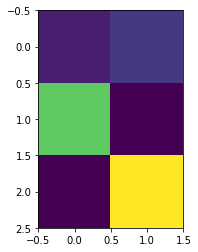

In [19]:
matplotlib.pyplot.imshow(a,interpolation="nearest")

In [20]:
class Dog:
    def bark (self):
        print("woof")
        pass
    pass

In [21]:
sizzles = Dog()

In [22]:
sizzles.bark()

woof


In [23]:
sizzles = Dog()
mutley = Dog()

sizzles.bark()
mutley.bark()

woof
woof


In [31]:
class Dog:
    def __init__(self,petname,temp):
        self.name = petname
        self.temperature = temp
    
    def status(self):
        print("dog name is ",self.name)
        print("dog temperature is",self.temperature)
        pass
    
    def setTemperature(self,temp):
        self.temperature = temp
        pass
    
    def bark (self):
        print("woof")
        pass
    pass

In [32]:
lassie = Dog("Lassie",37)

In [33]:
lassie.status()

dog name is  Lassie
dog temperature is 37


In [34]:
lassie.setTemperature(40)

In [35]:
lassie.status()

dog name is  Lassie
dog temperature is 40


# Neural Networks

In [57]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        self.wih = numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.activation_function = lambda x:scipy.special.expit(x)
        pass
    
    def train(self,inputs_list,targets_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        targets = numpy.array(targets_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T,output_errors)
        
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
        
    
    def query(self,inputs_list):
        inputs = numpy.array(inputs_list,ndmin=2).T
        hidden_inputs = numpy.dot(self.wih,inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who,hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

In [44]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

learning_rate = 0.3

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [45]:
n.query([1.0,0.5,-1.5])

array([[0.38081194],
       [0.38038342],
       [0.39092013]])

## check data set

In [46]:
data_file = open("mnist_train.csv","r")
data_list = data_file.readlines()
data_file.close()

In [48]:
len(data_list)

60000

### I download the mnist data set is larger than the data set in the book

In [49]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

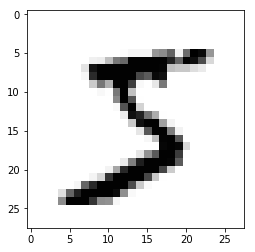

In [51]:
import numpy
import matplotlib.pyplot
%matplotlib inline

all_values = data_list[0].split(",")
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

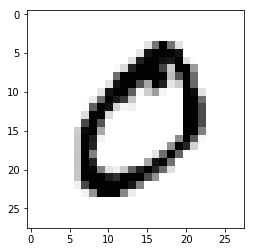

In [52]:
all_values = data_list[1].split(",")
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

In [53]:
scaled_input = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01

In [54]:
scaled_input

array([0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01   

In [55]:
onnodes = 10
targets = numpy.zeros(onnodes)+0.01
targets[int(all_values[0])] = 0.99

In [56]:
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

# start training

In [58]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

learning_rate = 0.3

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [60]:
training_data_file = open("mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [61]:
training_data_list = training_data_list[:100]

In [62]:
for record in training_data_list:
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets = numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

In [63]:
test_data_file = open("mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [64]:
all_values = test_data_list[0].split(",")
all_values[0]

'7'

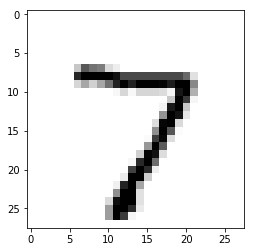

In [65]:
image_array = numpy.asfarray(all_values[1:]).reshape(28,28)
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation="None")

In [66]:
n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01)

array([[0.10206489],
       [0.0051651 ],
       [0.02747044],
       [0.15317561],
       [0.05002315],
       [0.04539302],
       [0.01616754],
       [0.91048099],
       [0.05663824],
       [0.01414573]])

The posibility is biggest which input is 7

In [71]:
scorecard = []
test_data_list = test_data_list[:11]
for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    print(correct_label,"correct_label")
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    print(label,"networks' answer")
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


7 correct_label
7 networks' answer
2 correct_label
3 networks' answer
1 correct_label
1 networks' answer
0 correct_label
0 networks' answer
4 correct_label
4 networks' answer
1 correct_label
1 networks' answer
4 correct_label
4 networks' answer
9 correct_label
3 networks' answer
5 correct_label
4 networks' answer
9 correct_label
7 networks' answer
0 correct_label
0 networks' answer


In [72]:
scorecard

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1]

In [73]:
scorecard_array = numpy.array(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)

performance= 0.6363636363636364


## if we use full data

In [74]:
training_data_file = open("mnist_train.csv","r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [75]:
for record in training_data_list:
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets = numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs,targets)
    pass

In [76]:
test_data_file = open("mnist_test.csv","r")
test_data_list = test_data_file.readlines()
test_data_file.close()

In [79]:
scorecard = []
for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [80]:
scorecard_array = numpy.array(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)

performance= 0.944


## if we train more epochs

In [81]:
epochs = 5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(",")
        inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets = numpy.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass

In [82]:
scorecard = []
for record in test_data_list:
    all_values = record.split(",")
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [83]:
scorecard_array = numpy.array(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)

performance= 0.9469


## we find the accuracy improved 